In [4]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Nov  4 14:26:28 2020

@author: apramanik
"""

from torch.utils.data import DataLoader
import numpy as np
import os, torch
import matplotlib.pyplot as plt

from tst_dataset import cardiacdata, cardiacdata2
from Auto3D_D4 import Auto3D

# from matplotlib import py
%matplotlib inline



def dice_comp(pred, gt):
    return (2. * (np.sum(pred.astype(float) * gt.astype(float))) + 1.) / (np.sum(pred.astype(float)) \
        + np.sum(gt.astype(float)) + 1.)



#%%
nImg=1
dispind=0
vol_slice=5
chunk_size=nImg
#%% Choose training model directory
############################## 3DAE #########################
subDirectory='19Apr_1111pm_70I_10000E_1B'

print(subDirectory)

#%%
cwd=os.getcwd()
# PATH= cwd+'/savedModels/'+subDirectory #complete path
PATH= r'/home/jovyan/project_segmentation_models/19'#+subDirectory #complete path

#%%
tst_dataset = cardiacdata2(label_dir=None)
#tst_dataset2 = cardiacdata2(label_dir=None)
print("ok")

19Apr_1111pm_70I_10000E_1B
ok


DICE Right Ventricle: 0.00001
DICE Myocardium: 0.00000
DICE Left Ventricle: 0.00000


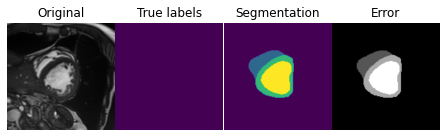

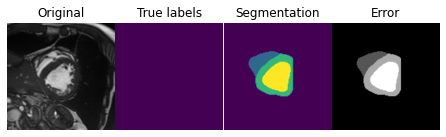

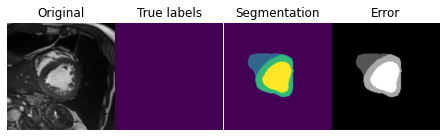

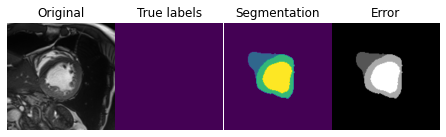

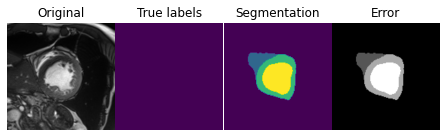

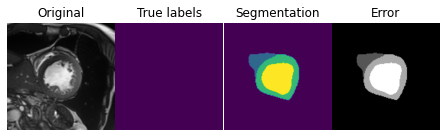

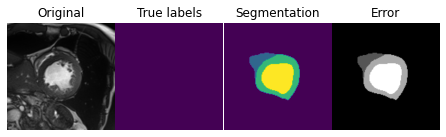

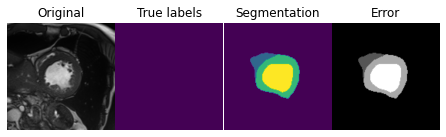

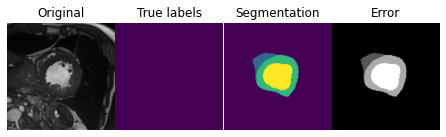

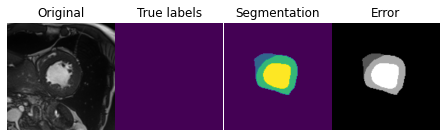

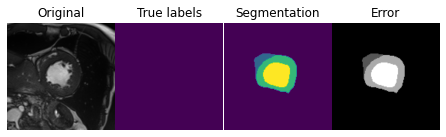

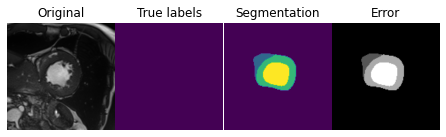

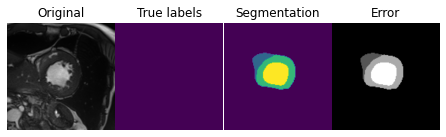

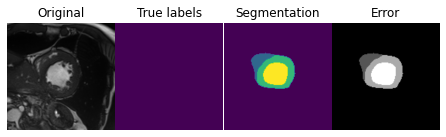

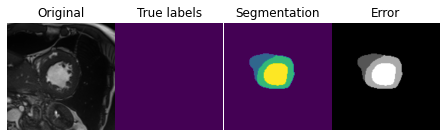

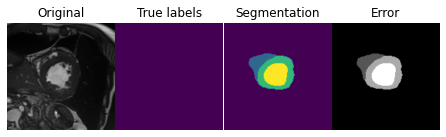

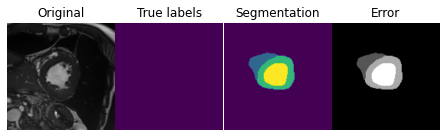

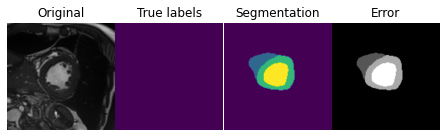

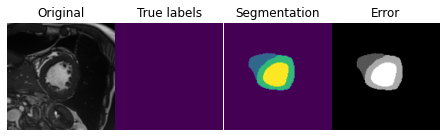

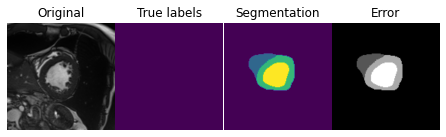

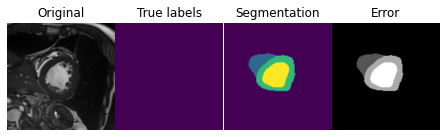

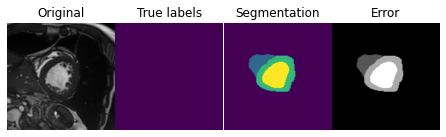

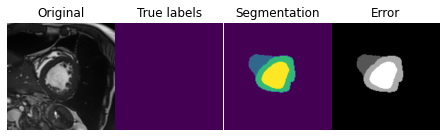

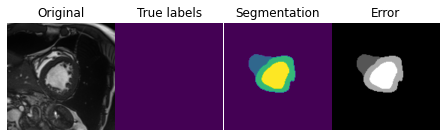

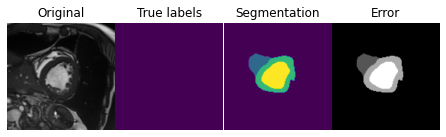

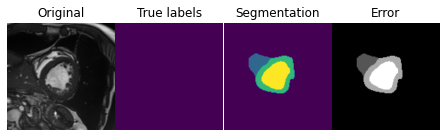

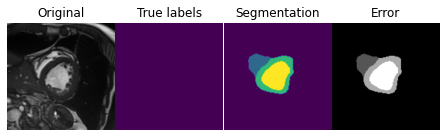

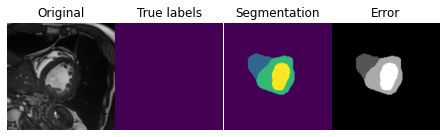

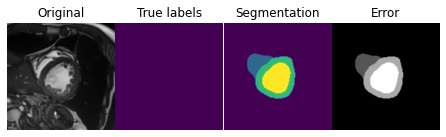

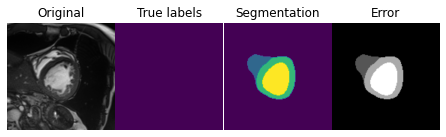

In [5]:
tst_loader = DataLoader(tst_dataset, batch_size=1, shuffle=False, num_workers=0)
# network
net = Auto3D(num_classes=4, in_channels=1, depth=4, start_filts=32, res=False).cuda()
net.load_state_dict(torch.load(os.path.join(PATH, "model_best.pth.tar"))['state_dict'])
img_shape = tst_dataset.img.shape
normOrg=np.zeros((1,img_shape[1],img_shape[2],img_shape[3]),dtype=np.float32)
normGT=np.zeros((1,img_shape[1],img_shape[2],img_shape[3]),dtype=np.int16)
normSeg=np.zeros((1,img_shape[1],img_shape[2],img_shape[3]),dtype=np.int16)
dice = np.zeros((nImg, 3))
net.eval()
for step, (img, seg_gt) in enumerate(tst_loader, 0):
    img, seg_gt = img.cuda(), seg_gt.cuda()
    pred = net(img)
    _, pred = torch.max(pred, 1)

    pred = pred.squeeze().detach().cpu().numpy().astype(np.int8)
    img = img.squeeze().detach().cpu().numpy()
    gt = seg_gt.squeeze().detach().cpu().numpy().astype(np.int8)
    for i in range(3):
            dice[step, i] = dice_comp(pred==i+1, gt==i+1)
    normOrg[step]=img
    normGT[step]=gt
    normSeg[step]=pred


    
print("DICE Right Ventricle: {0:.5f}".format(np.mean(dice[:,0])))
print("DICE Myocardium: {0:.5f}".format(np.mean(dice[:,1])))
print("DICE Left Ventricle: {0:.5f}".format(np.mean(dice[:,2])))



#%%%
normOrg=np.reshape(normOrg,[int(normOrg.shape[1]/8),8,144,144])
normGT=np.reshape(normGT,[int(normGT.shape[1]/8),8,144,144])
normSeg=np.reshape(normSeg,[int(normSeg.shape[1]/8),8,144,144])
normError=np.abs(normGT.astype(np.float32)-normSeg.astype(np.float32))
normOrg=normOrg-normOrg.min()
#%% Display the output images

for dispind in range(normOrg.shape[0]):
    plot= lambda x: plt.imshow(x,cmap=plt.cm.gray,interpolation='bilinear')
    plot1= lambda x: plt.imshow(x,interpolation='bilinear')
    plt.clf()
    plt.subplot(141)
    plot(np.abs(normOrg[dispind,vol_slice,:,:]))
    plt.axis('off')
    plt.title('Original')
    plt.subplot(142)
    plot1(np.abs(normGT[dispind,vol_slice,:,:]))
    plt.axis('off')
    plt.title('True labels')
    plt.subplot(143)
    plot1(np.abs(normSeg[dispind,vol_slice,:,:]))
    plt.axis('off')
    plt.title('Segmentation')
    plt.subplot(144)
    plot(np.abs(normError[dispind,vol_slice,:,:]))
    plt.title('Error')
    plt.axis('off')
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0,wspace=.01)
    plt.show()

In [3]:
dispind=1

In [2]:
np.max(tst_dataset.img)

8.484384

In [3]:
np.max(tst_dataset2.img)

9.822155